
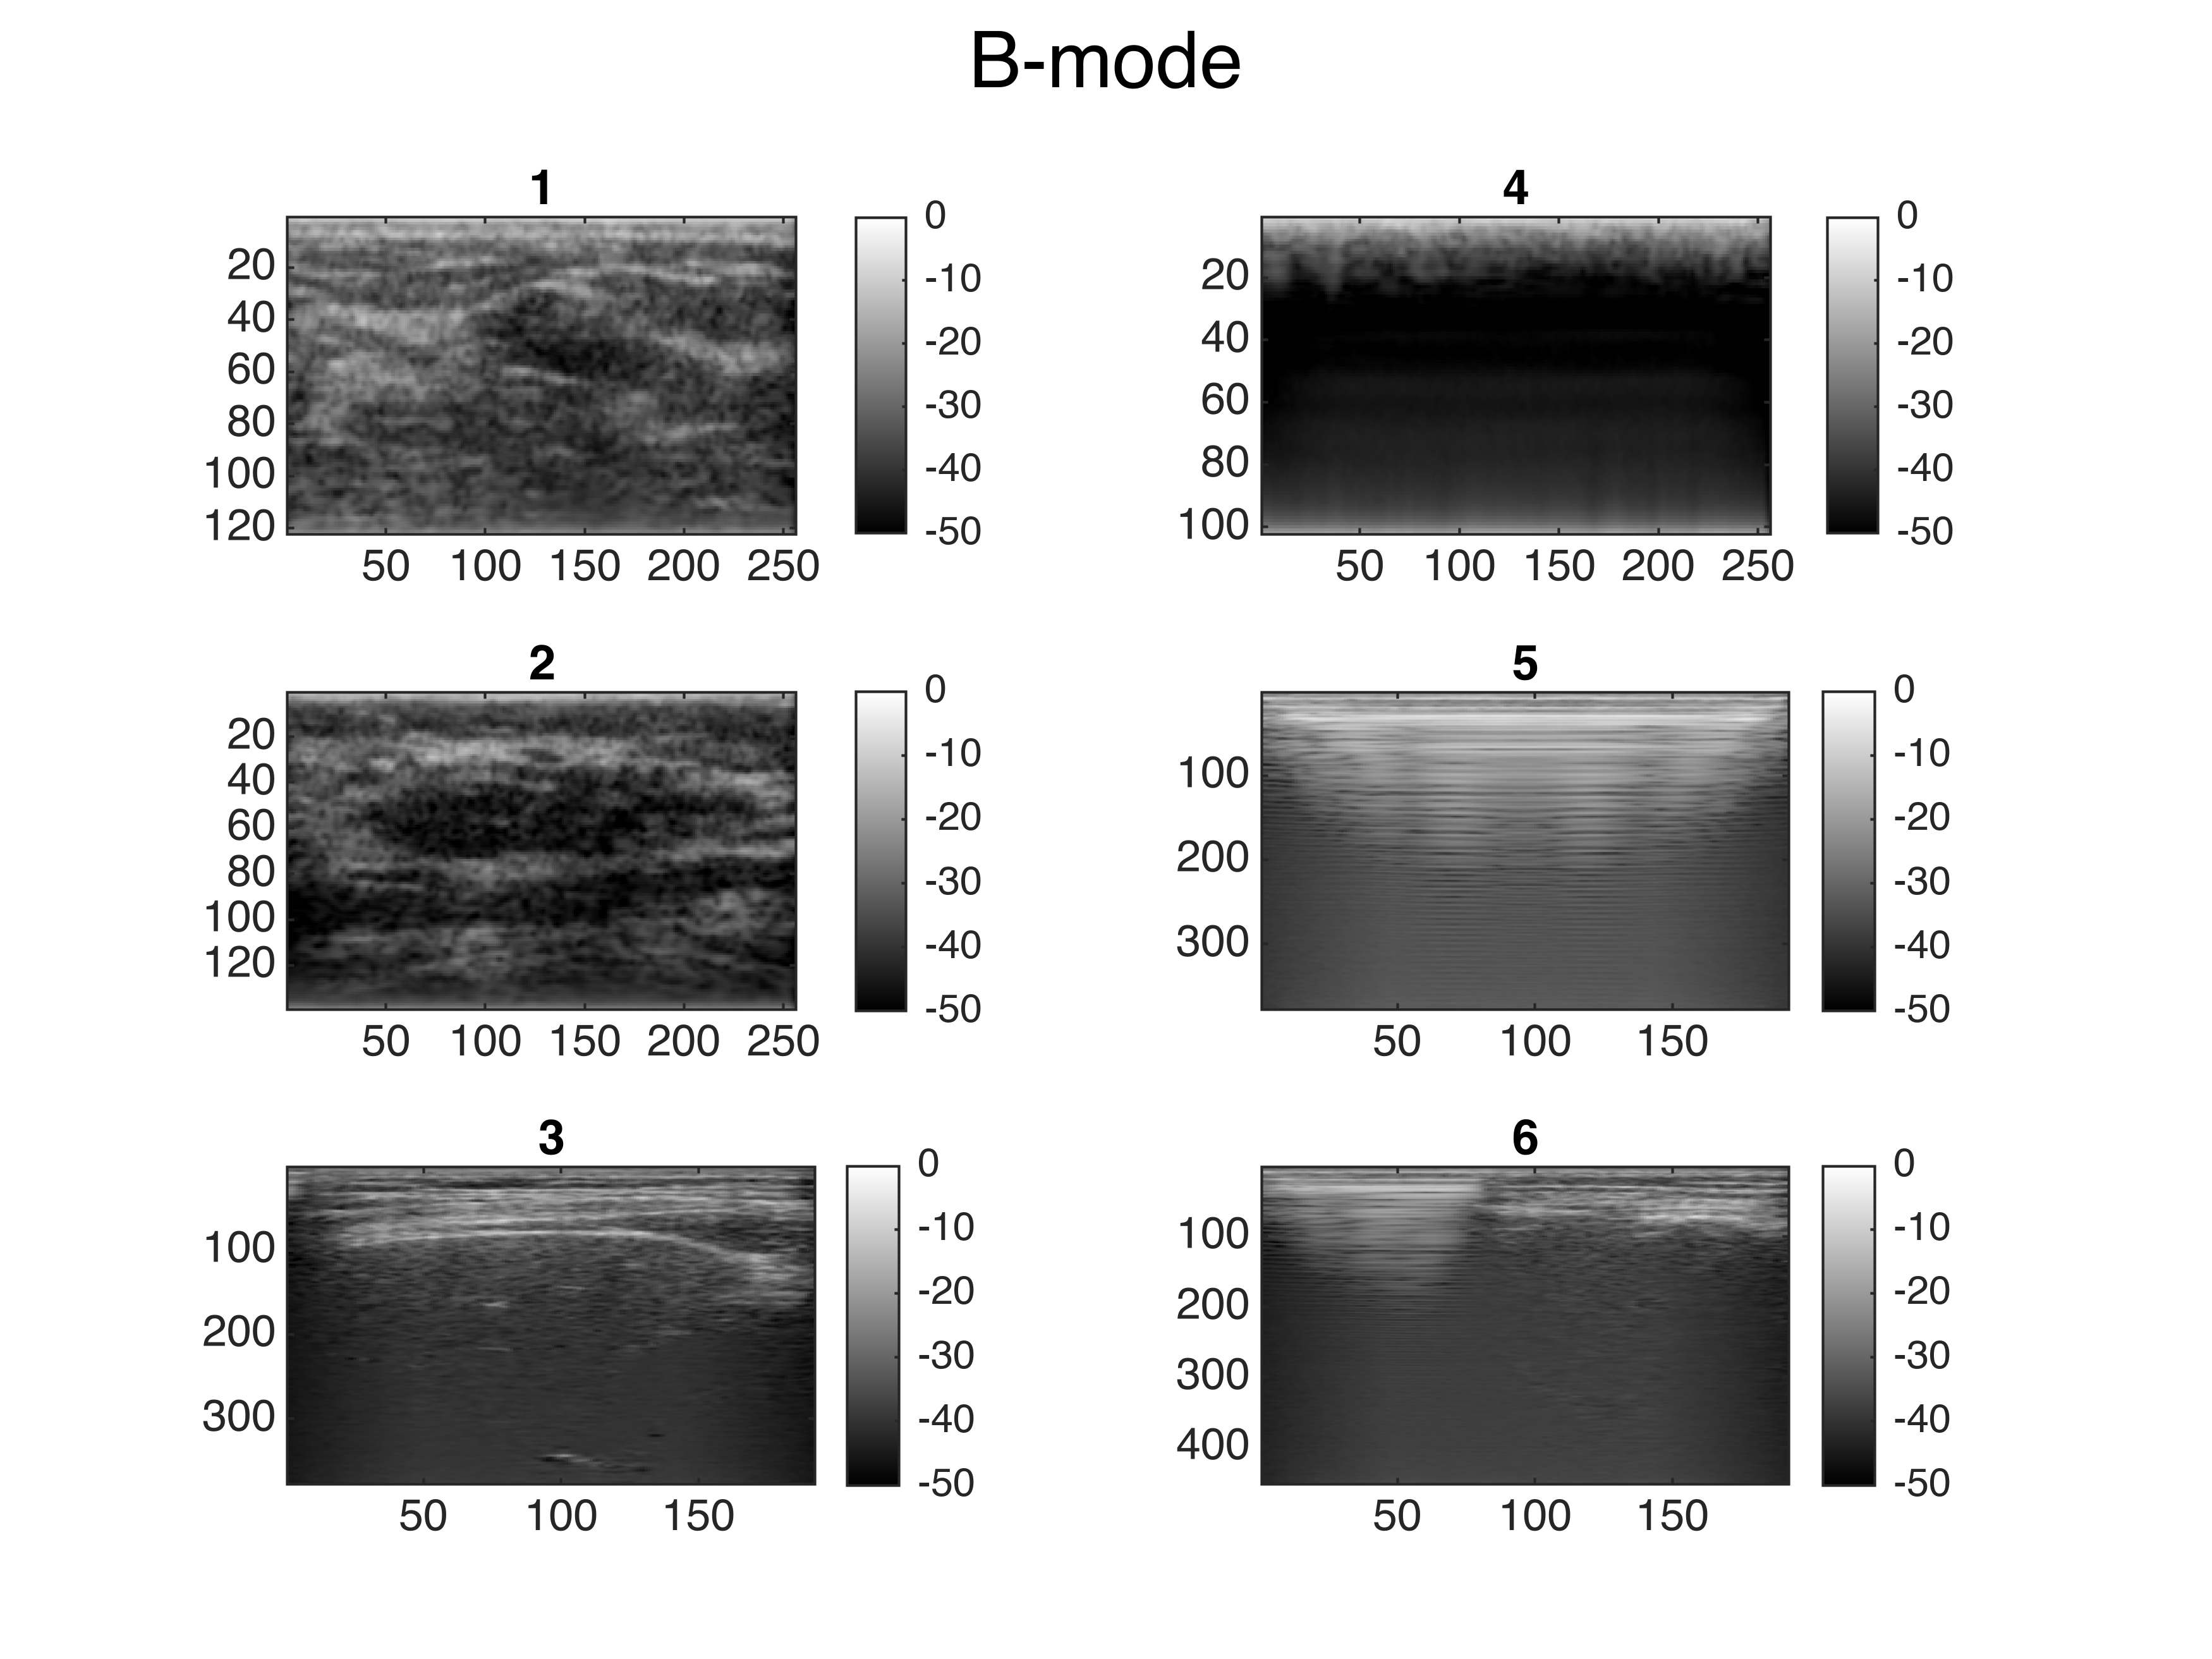

In [1]:
close all;clear;clc;
addpath('../../code/functions/');

files = dir(fullfile('../dataoncosalud_recovery/', '**', '*.rf'));

tot=size(files,1);

meanlst=[];
stdlst=[];
snrlst=[];
medianlst=[];
graythreshlst=[];
edgesmean2ndhalf=[];

n=1;
index = reshape(1:6, 2, 3).';

% for i=1:tot
for i=[1 12 45 43 44 51]
% for i=tot-(0:5)
    rfpath=fullfile(files(i).folder, files(i).name);
    pngpath=[rfpath(1:end-2),'png'];
    % disp(rfpath);
    % disp(pngpath);
    % if exist(pngpath, 'file') == 2
    %     winopen(pngpath);
    % else
    %     disp('PNG does not exist.');
    % end

    % keyboard;
    [rf,feat] = RPread(rfpath);
    env_rf=abs(hilbert(rf));

    z=(1540/(2*feat.sf))*feat.h;
    x=0.038;
    z=linspace(0,z,size(rf,1));
    x=linspace(0,x,size(rf,2));
    feat.z=z;
    feat.x=x;

    res=x(2)-x(1);
    z_interp=z(1):res*2:z(end);
    feat.z_interp=z_interp;

    [X,Z]=meshgrid(x,z);
    [X_interp,Z_interp]=meshgrid(x,z_interp);

    % j=1;
    % [~,~,comp_env]=getab(env_rf,j);
    comp_env=20*log10(env_rf/max(env_rf(:)));
    comp_env_interp = interp2(X,Z,comp_env,X_interp,Z_interp);

    % meanlst=[meanlst,mean(comp_env(:))];
    % stdlst=[stdlst,std(comp_env(:))];
    % snrlst=[stdlst,std(comp_env(:))];
    % medianlst=[medianlst,mean(comp_env(:))/median(comp_env(:))];
    % graythreshlst=[graythreshlst,graythresh(rescale(comp_env(:),0,1))];

    % subplot(3,2,index(n));imagesc(comp_env);colormap gray;clim([-50 0]);colorbar;
    % n=n+1;
    % figure;histogram(comp_env);

    comp_env_interp=imgaussfilt(comp_env_interp,1);
    figure(1);
    subplot(3,2,index(n));imagesc(comp_env_interp);
    colormap gray;clim([-50 0]);colorbar;
    title(n);

    edges=edge(rescale(comp_env_interp,0,1), 'Canny');
    edgesmean2ndhalf=[edgesmean2ndhalf,mean(edges(ceil(end/2):end, :), 'all')];
    figure(2);
    subplot(3,2,index(n));imagesc(edges);title(n);
    n=n+1;

end
figure(1);sgtitle('B-mode')


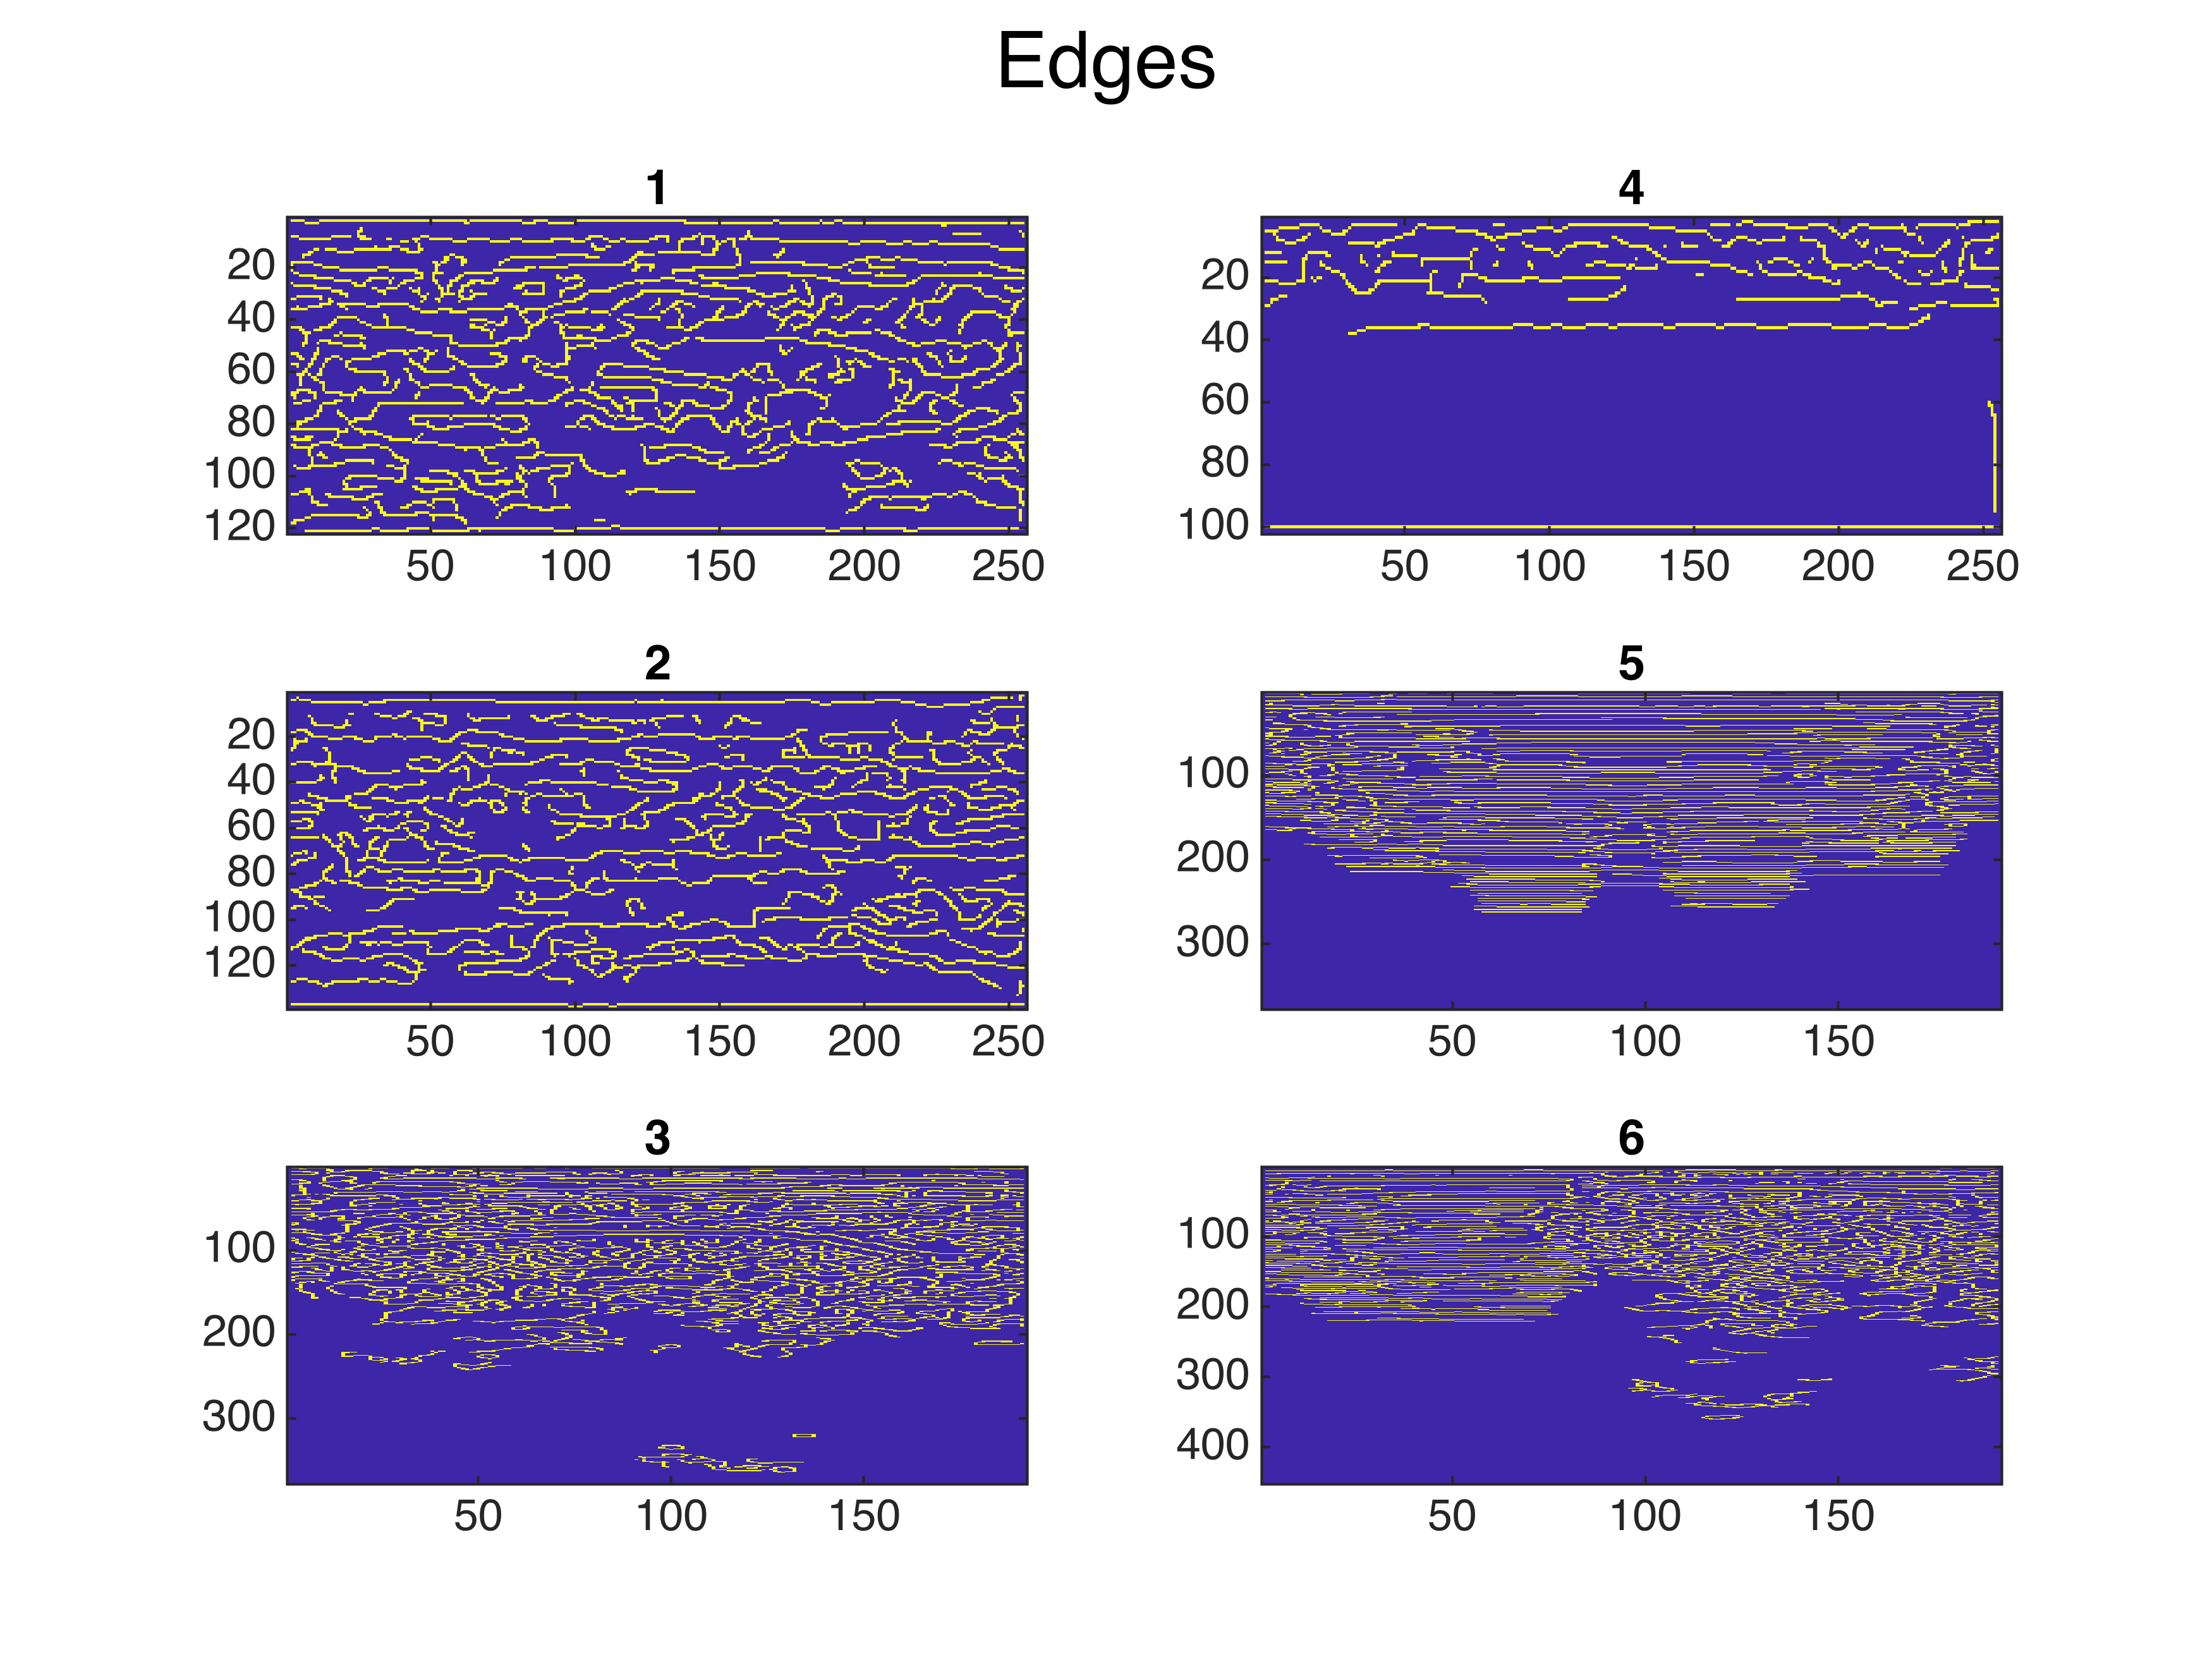

In [2]:
figure(2);sgtitle('Edges')


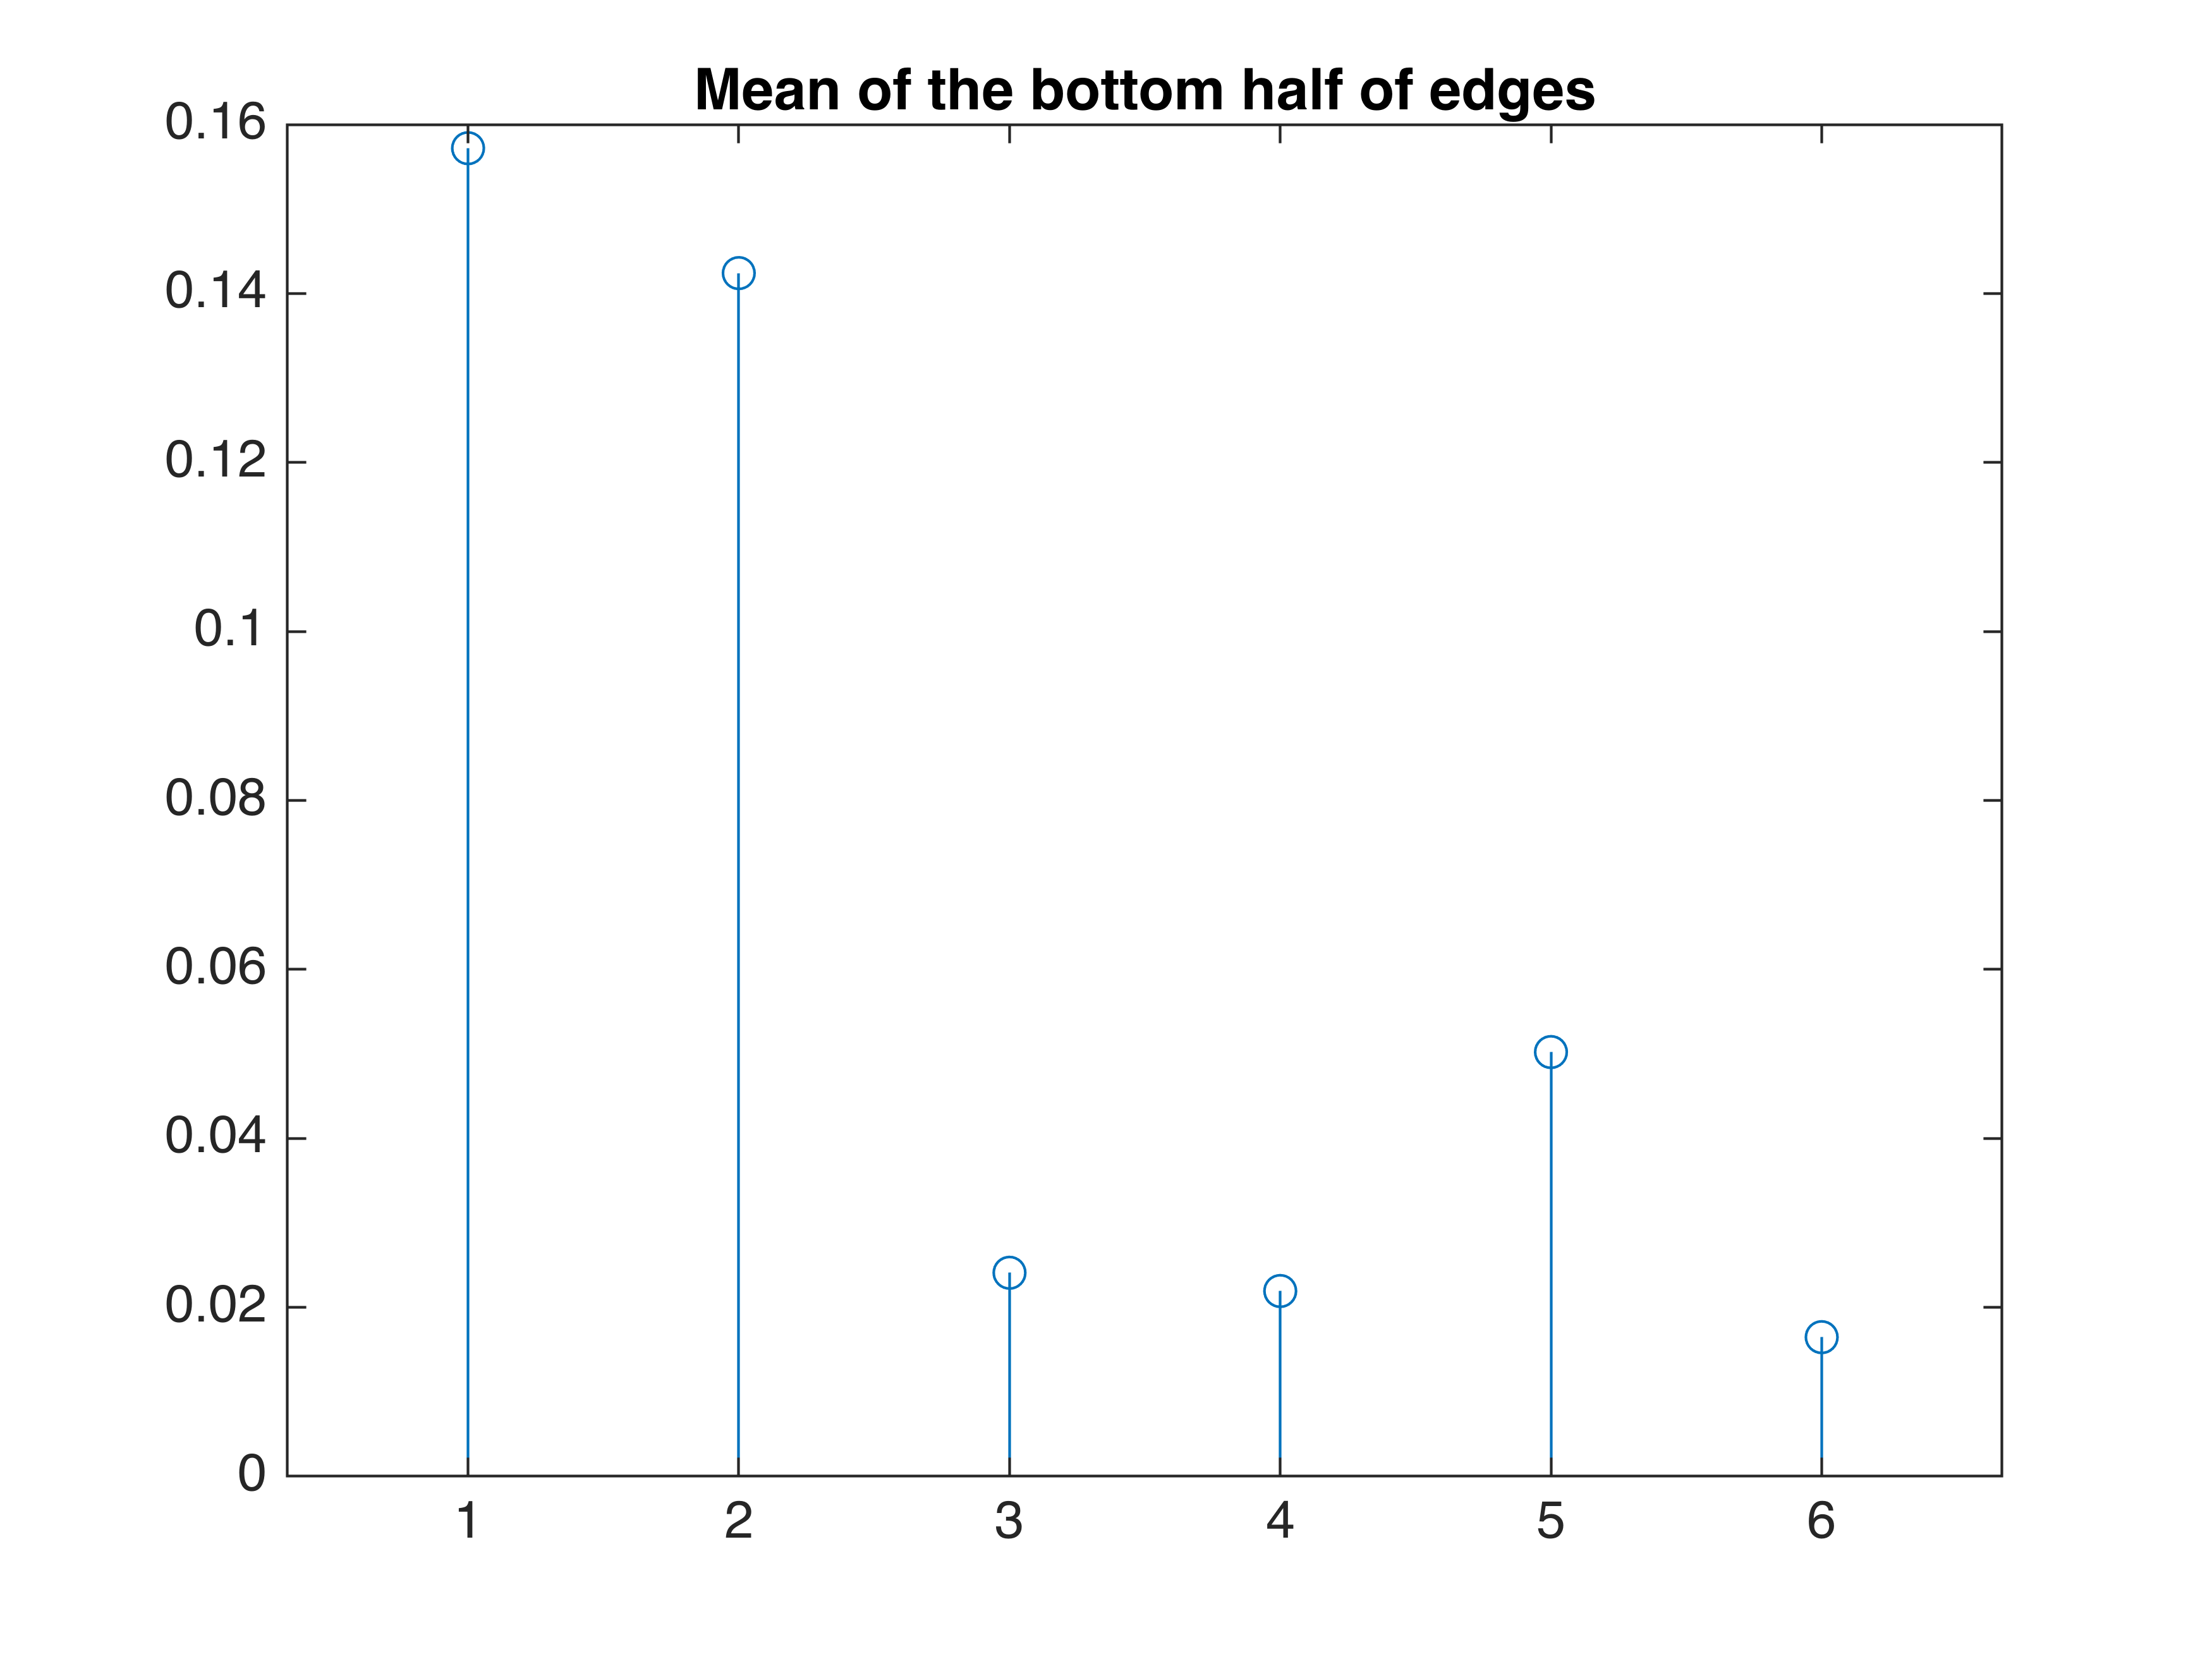

In [3]:
% meanlst
% stdlst
% snrlst
% medianlst
% graythreshlst
figure;stem(edgesmean2ndhalf);title('Mean of the bottom half of edges')